In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

bob_ross = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-02-21/bob_ross.csv')

In [ ]:
bob_ross.head()

,painting_index,img_src,painting_title,season,episode,num_colors,youtube_src,colors,color_hex,Black_Gesso,...,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
0,282,https://www.twoinchbrush.com/images/painting28...,A Walk in the Woods,1,1,8,https://www.youtube.com/embed/oh5p5f5_-7A,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True
1,283,https://www.twoinchbrush.com/images/painting28...,Mt. McKinley,1,2,8,https://www.youtube.com/embed/RInDWhYceLU,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True
2,284,https://www.twoinchbrush.com/images/painting28...,Ebony Sunset,1,3,9,https://www.youtube.com/embed/UOziR7PoVco,"['Alizarin Crimson', 'Black Gesso', 'Bright Re...","['#4E1500', '#000000', '#DB0000', '#FFEC00', '...",True,...,False,False,False,True,True,True,True,True,False,True
3,285,https://www.twoinchbrush.com/images/painting28...,Winter Mist,1,4,3,https://www.youtube.com/embed/0pwoixRikn4,"['Prussian Blue', 'Titanium White', 'Van Dyke ...","['#021E44', '#FFFFFF', '#221B15']",False,...,False,False,False,False,True,False,True,True,False,False
4,286,https://www.twoinchbrush.com/images/painting28...,Quiet Stream,1,5,8,https://www.youtube.com/embed/DFSIQNjKRfk,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True


In [ ]:
bob_ross.shape, bob_ross.columns[:15]

((403, 27),
 Index(['painting_index', 'img_src', 'painting_title', 'season', 'episode',
        'num_colors', 'youtube_src', 'colors', 'color_hex', 'Black_Gesso',
        'Bright_Red', 'Burnt_Umber', 'Cadmium_Yellow', 'Dark_Sienna',
        'Indian_Red'],
       dtype='object'))

In [ ]:
bob_ross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   painting_index    403 non-null    int64 
 1   img_src           403 non-null    object
 2   painting_title    403 non-null    object
 3   season            403 non-null    int64 
 4   episode           403 non-null    int64 
 5   num_colors        403 non-null    int64 
 6   youtube_src       403 non-null    object
 7   colors            403 non-null    object
 8   color_hex         403 non-null    object
 9   Black_Gesso       403 non-null    bool  
 10  Bright_Red        403 non-null    bool  
 11  Burnt_Umber       403 non-null    bool  
 12  Cadmium_Yellow    403 non-null    bool  
 13  Dark_Sienna       403 non-null    bool  
 14  Indian_Red        403 non-null    bool  
 15  Indian_Yellow     403 non-null    bool  
 16  Liquid_Black      403 non-null    bool  
 17  Liquid_Clear    

# EDA 1: Overall structure exploration - what is the distribution of color usage?

The initial structural analysis examines the usage of all colors in Bob Ross's paintings, aiming to determine whether there exists a discernible variation in color frequency when no other conditions are applied.

In [ ]:
# Some color labels include non-standard characters, but each color appears consistently with the same label, so the frequency counts  are not affected by duplicate representations.
colors_exploded = (
    bob_ross["colors"]
    .astype(str)
    .str.strip("[]")
    .str.replace("'", "", regex=False)
    .str.split(",")
    .explode()
    .str.strip() # remove spaces
)

color_counts = colors_exploded.value_counts()
top_n = 15
top_colors = color_counts.head(top_n)

top_colors

,count
colors,
Titanium White,400
Alizarin Crimson,380
Van Dyke Brown,371
Cadmium Yellow,346
Yellow Ochre,327
Phthalo Blue,323
Bright Red,321
Midnight Black\r\n\r\n,317
Sap Green,306


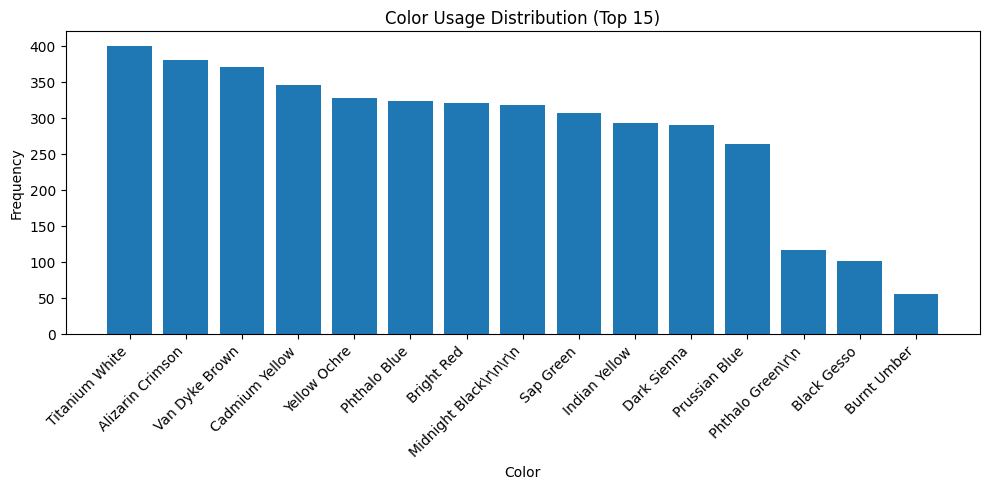

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(top_colors.index, top_colors.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Frequency")
plt.xlabel("Color")
plt.title("Color Usage Distribution (Top 15)")
plt.tight_layout()
plt.show()

Summary: Titanium White appears in about 400 out of 403 paintings, followed by Alizarin Crimson and Van Dyke Brown (each used in over 90% of paintings), while most other colors drop sharply in frequency, indicating a small, stable core palette with a long tail of auxiliary colors.

# EDA 2: Distribution of Color Usage Across Paintings

# 2.1 Are there clear differences in usage frequency across colors?

This EDA analyzes the frequency with which individual colors appear across paintings to distinguish core palette colors from more variable stylistic choices. By examining binary color usage indicators, we gain an initial understanding of the structural foundations of Bob Ross’s visual style.

In [ ]:
# Select all binary color indicator columns
color_cols = bob_ross.select_dtypes("bool").columns

# Compute the proportion of paintings that use each color
color_freq = bob_ross[color_cols].mean().sort_values(ascending=False)
color_freq.head(10)

,0
Titanium_White,0.993
Alizarin_Crimson,0.943
Van_Dyke_Brown,0.921
Cadmium_Yellow,0.859
Yellow_Ochre,0.811
Phthalo_Blue,0.801
Bright_Red,0.797
Midnight_Black,0.787
Sap_Green,0.759
Indian_Yellow,0.725


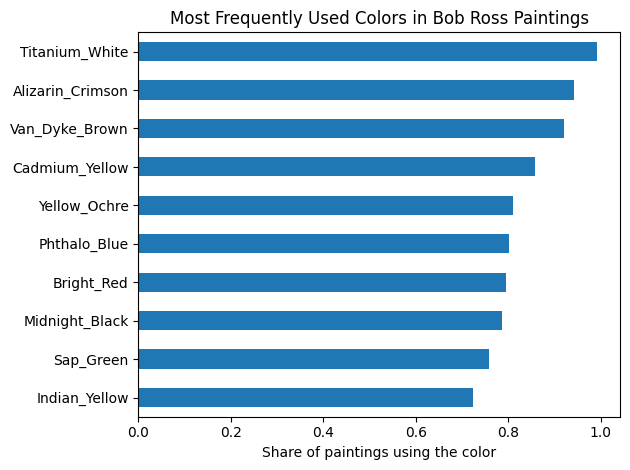

In [ ]:
# Visualize the top 10 most frequently used colors
plt.figure()
color_freq.head(10).sort_values().plot(kind="barh")
plt.xlabel("Share of paintings using the color")
plt.title("Most Frequently Used Colors in Bob Ross Paintings")
plt.tight_layout()
plt.show()

Summary: The results indicate that Bob Ross relies heavily on a small group of core colors, while other colors are used more selectively. This pattern suggests a consistent underlying palette with limited variation around it.

# 2.2 How many colors are usually used in paintings?

This analysis focuses on understanding how much visual complexity Bob Ross typically employs in a single painting, measured by the number of unique colors used. By examining the distribution of palette complexity, the goal is to assess whether most paintings follow a consistent level of complexity or whether there are distinct groups ranging from minimal to highly complex palettes.

In [ ]:
bob_ross["num_colors"].describe()

,num_colors
count,403.000
mean,10.605
std,2.379
min,1.000
25%,9.000
50%,11.000
75%,12.000
max,15.000


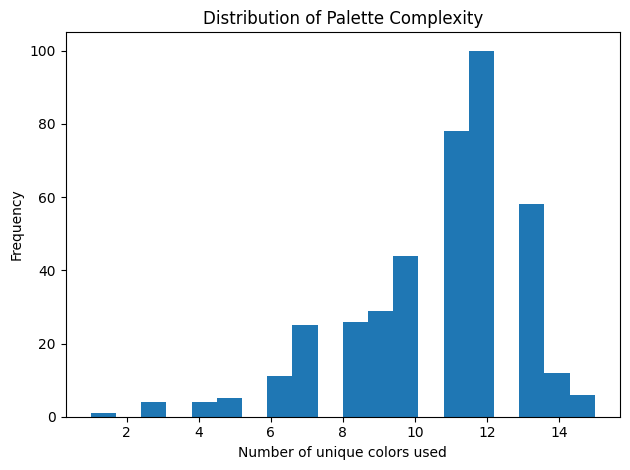

In [ ]:
# Visualize how many unique colors are typically used in a painting
plt.figure()
bob_ross["num_colors"].plot(kind="hist", bins=20)
plt.xlabel("Number of unique colors used")
plt.title("Distribution of Palette Complexity")
plt.tight_layout()
plt.show()

Summary: Most paintings use around 10–12 unique colors, with very few works using extremely small or very large palettes. This narrow concentration suggests that Bob Ross generally maintains a consistent level of palette complexity, with only occasional deviations.

# EDA 3: Explore the usage relationships among colors

# 3.1 Do paintings with a large number of colors use rare colors?

This analysis examines whether paintings with higher palette complexity rely more on rare colors. By analyzing how rare color usage changes as the number of colors increases, we aim to understand how palette complexity is constructed rather than imposed by arbitrary grouping.

In [ ]:
# Identify rare colors based on overall usage frequency
color_usage_rate = bob_ross[color_cols].mean()
rare_colors = color_usage_rate[color_usage_rate < 0.4].index

In [ ]:
# Count how many rare colors are used in each painting
bob_ross["num_rare_colors"] = bob_ross[rare_colors].sum(axis=1)

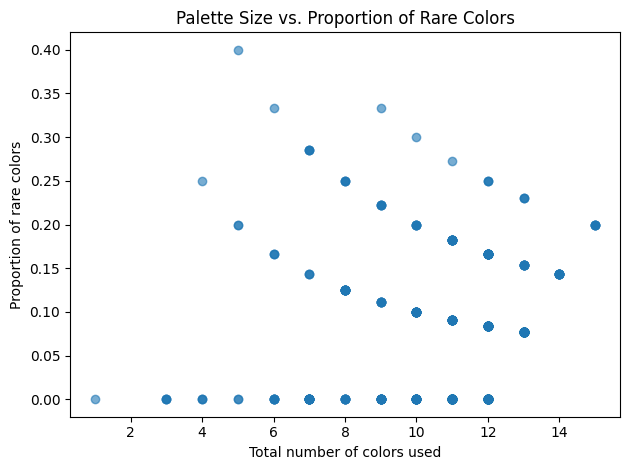

In [ ]:
bob_ross["rare_color_ratio"] = (
    bob_ross["num_rare_colors"] / bob_ross["num_colors"]
)

plt.figure()
plt.scatter(bob_ross["num_colors"], bob_ross["rare_color_ratio"], alpha=0.6)
plt.xlabel("Total number of colors used")
plt.ylabel("Proportion of rare colors")
plt.title("Palette Size vs. Proportion of Rare Colors")
plt.tight_layout()
plt.show()

Summary:
UThe scatter plot shows that as the total number of colors in a painting increases, the proportion of rare colors does not increase and instead tends to decline. Paintings with large palettes rely primarily on frequently used core colors, suggesting that palette complexity is achieved through recombining familiar colors rather than introducing many uncommon ones.

# 3.2 Co-occurrence Patterns Among Frequently Used Colors

This analysis examines how colors tend to appear together in Bob Ross paintings, rather than in isolation. By studying color co-occurrence patterns, the goal is to understand whether Bob Ross relied on stable, recurring color combinations that define his visual style, or whether palettes varied freely across paintings. Identifying consistent color pairings helps reveal implicit design rules behind the artwork—such as base colors that anchor compositions and accent colors that are selectively combined. This provides insight into the structure of artistic decision-making and helps distinguish intentional stylistic patterns from random color usage.

In [ ]:
# Compute a color co-occurrence matrix showing how often pairs of colors appear together in the same painting
top10_cols = color_freq.head(10).index
color_matrix = bob_ross[top10_cols].astype(int)
cooccur = color_matrix.T.dot(color_matrix)

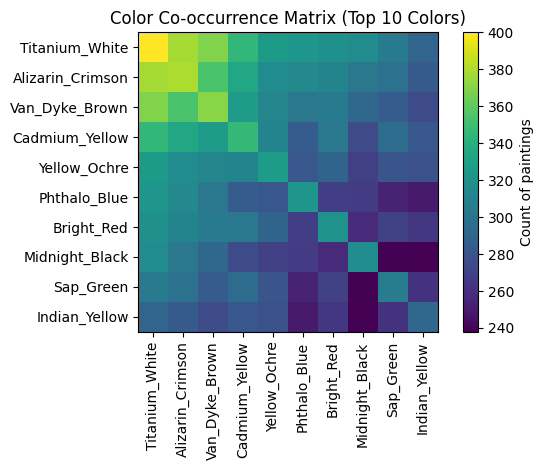

In [ ]:
# Visualize the color co-occurrence matrix to identify frequently paired colors across paintings
plt.figure()
plt.imshow(cooccur.values)
plt.xticks(range(len(top10_cols)), top10_cols, rotation=90)
plt.yticks(range(len(top10_cols)), top10_cols)
plt.title("Color Co-occurrence Matrix (Top 10 Colors)")
plt.colorbar(label="Count of paintings")
plt.tight_layout()
plt.show()

Summary: The co-occurrence matrix reveals clear relationships among core colors, with certain colors—such as Titanium White, Alizarin Crimson, and Van Dyke Brown—frequently appearing together. This indicates that color usage is structured, with stable combinations rather than independent or random selection.

# EDA 4: The influence of time on creation

# 4.1 What are the color differences between different seasons?

This analysis examines whether Bob Ross’s use of color complexity changes over time across seasons of the show. By comparing average palette complexity by season, the goal is to identify potential temporal patterns, such as stylistic phases or shifts in instructional emphasis.

In [ ]:
# Compute the average number of colors used per painting for each season
season_mean = bob_ross.groupby("season")["num_colors"].mean()
season_mean

,num_colors
season,
1,7.077
2,11.154
3,9.846
4,10.000
5,8.538
6,10.462
7,9.385
8,10.615
9,10.769


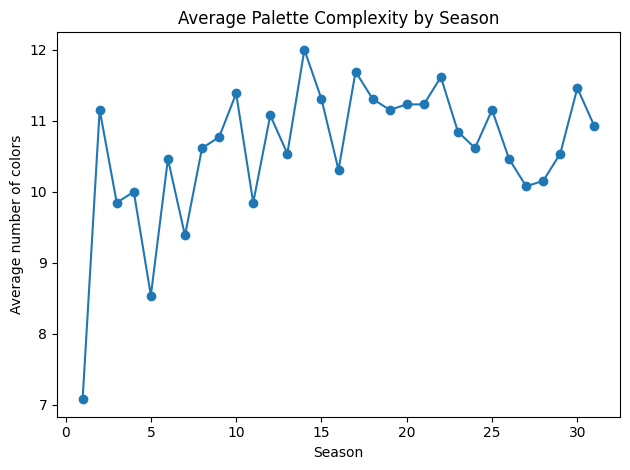

In [ ]:
# Plot average palette complexity by season to observe potential changes over time
plt.figure()
season_mean.plot(marker="o")
plt.xlabel("Season")
plt.ylabel("Average number of colors")
plt.title("Average Palette Complexity by Season")
plt.tight_layout()
plt.show()

Summary: Average palette complexity stabilizes after the initial seasons, with only moderate fluctuations across time. This indicates limited temporal variation in color complexity and suggests that changes in visual structure are incremental rather than driven by season-level shifts.

# 4.2 Does the frequency of use of the core color change with the seasons?

This analysis examines whether the usage frequency of core colors remains stable across seasons. By tracking how often the most frequently used colors appear in each season, we aim to understand whether Bob Ross’s visual style is temporally consistent or whether subtle shifts in palette preferences occur over time. This helps assess whether stylistic consistency is maintained across episodes or gradually evolves throughout the series.

In [ ]:
# Calculate average usage rate of core colors for each season
season_core_usage = (
    bob_ross
    .groupby("season")[core_colors]
    .mean()
    .mean(axis=1)
)

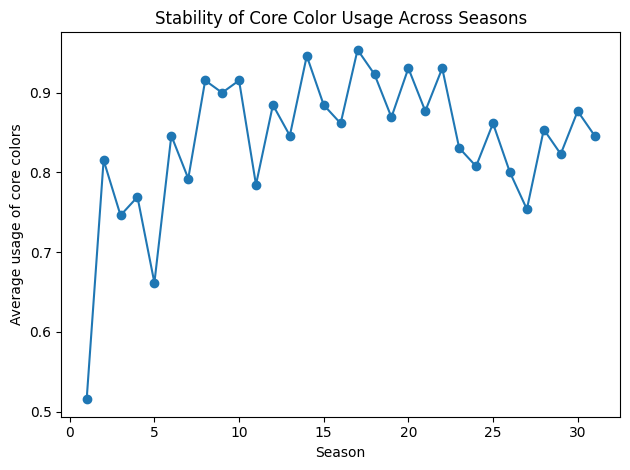

In [ ]:
# Plot how core color usage changes across seasons
plt.figure()
season_core_usage.plot(marker="o")
plt.xlabel("Season")
plt.ylabel("Average usage of core colors")
plt.title("Stability of Core Color Usage Across Seasons")
plt.tight_layout()
plt.show()


Summary: The usage of core colors remains high and relatively stable across seasons, indicating strong stylistic consistency over time.